In [2]:
!python -m pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 4.5 MB/s eta 0:00:00


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
%matplotlib inline

In [3]:
file_path = r"D:\GitHub\coc_bot\src\base_downloader\layouts\th15\v2-63a3d2141d32df06332f3095.jpg"

In [66]:
img = cv.imread(file_path, 0)
#img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [67]:
img.shape

(700, 1179)

In [68]:
#img = img.astype('float') / 255.0

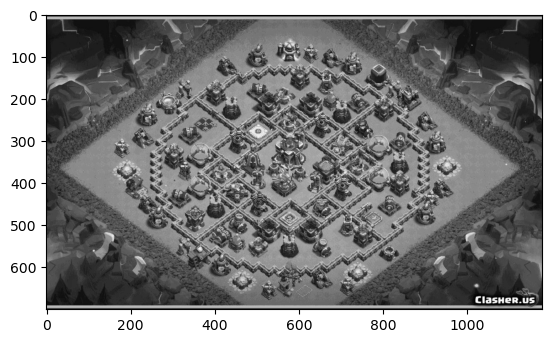

In [70]:
plt.imshow(img, cmap='gray')

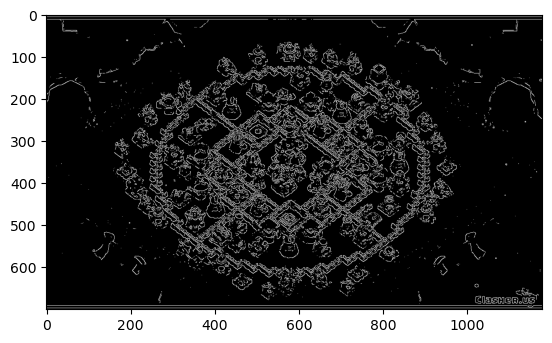

In [87]:
edges = cv.Canny(img,300,300)
plt.imshow(edges, cmap='gray')

In [63]:
ret,thresh4 = cv.threshold(img,25,255,cv.THRESH_TOZERO)

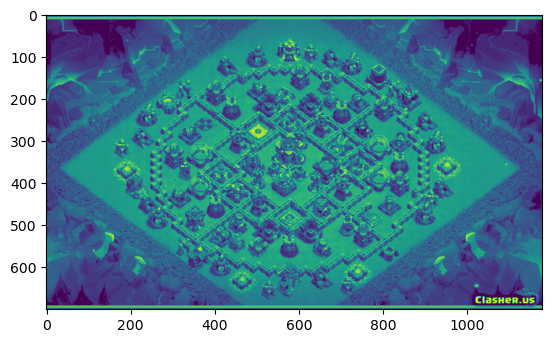

In [64]:
plt.imshow(thresh4)

In [17]:
thresh4 = thresh4.astype(float) * 255

In [32]:
thresh4 = thresh4.astype(int)
y, x = np.histogram(thresh4)
print(x.shape, y.shape)

(11,) (10,)


In [35]:
x

array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
       229.5, 255. ])

In [40]:
y = np.insert(y, 0, 0, axis=0)

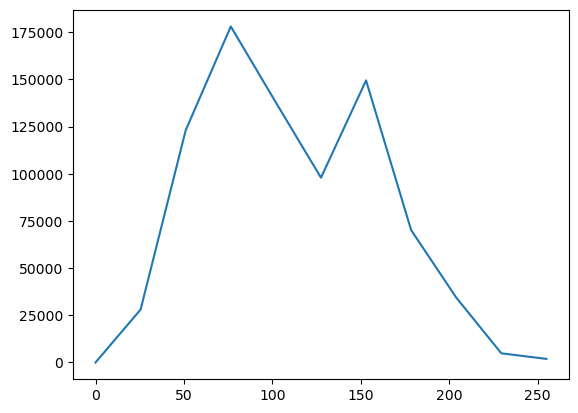

In [41]:
plt.plot(x, y)

In [58]:
hist = cv.calcHist([thresh4], [0], None, [256], [0, 256])

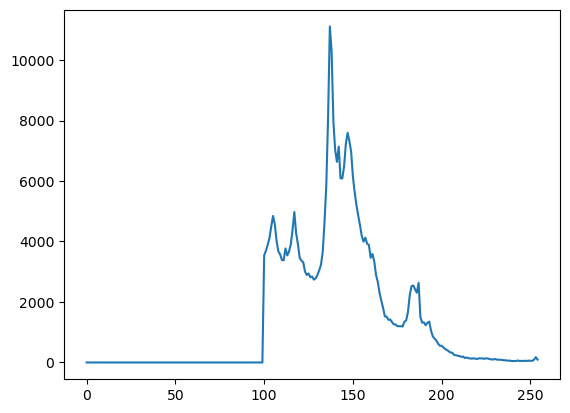

In [61]:
plt.plot(hist[1:])

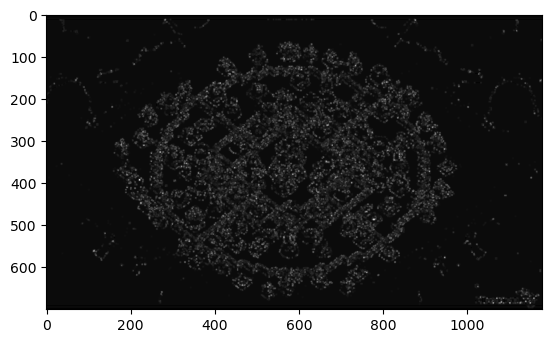

In [102]:
dst = cv.cornerHarris(edges,2,3,0.04)
dst = cv.dilate(dst,None)
#img[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(dst, 'gray')

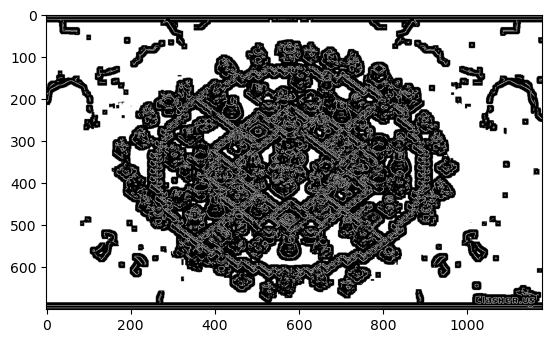

In [91]:
new = cv.adaptiveThreshold(edges, 255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,15, 4)
plt.imshow(new, 'gray')

In [93]:
contours, hierarchy = cv.findContours(new, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

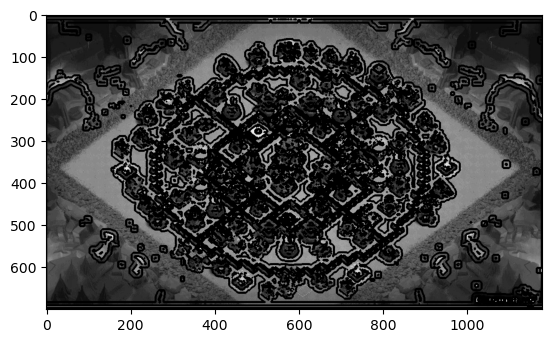

In [97]:
img_cnt = cv.drawContours(img, contours, -1, (0,255,0), 3)
plt.imshow(img_cnt, cmap="gray")